<a href="https://colab.research.google.com/github/ginSpirit/ml-lab/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
uint8 uint8
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7242 - loss: 0.7636 - val_accuracy: 0.8774 - val_loss: 0.3355
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8780 - loss: 0.3348 - val_accuracy: 0.8919 - val_loss: 0.3008
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8971 - loss: 0.2808 - val_accuracy: 0.9030 - val_loss: 0.2653
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9077 - loss: 0.2501 - val_accuracy: 0.9107 - val_loss: 0.2432
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9214 - loss: 0.2169 - val_accuracy: 0.9117 - val_loss: 0.2345
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9288 - loss: 0.1957 - val_accuracy: 0.9029 - val_loss: 0.2573
Epoch 7/10
938/938 ━━━━━━━━━━━━

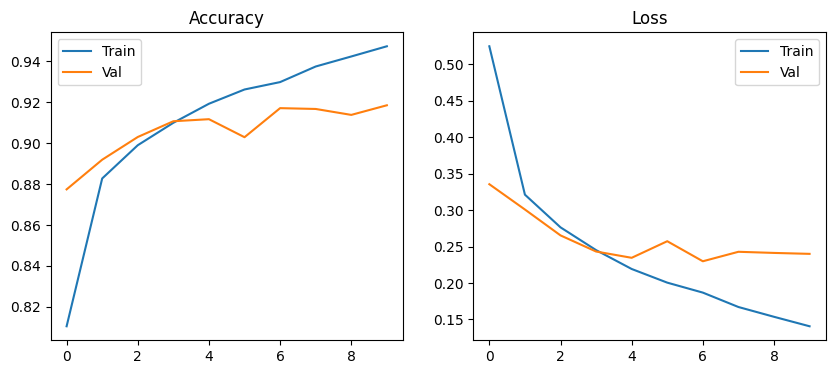

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load & preprocess Fashion‑MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Check dtype here
print(x_train.dtype, y_train.dtype)

# Rescale and expand dims
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
x_train = x_train[..., None]  # (28,28,1)
x_test  = x_test[..., None]

# One-hot encode labels
y_train = to_categorical(y_train, 10).astype('float32')
y_test  = to_categorical(y_test, 10).astype('float32')

# Define CNN
def create_cnn_model():
    inp = Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inp)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(10, activation='softmax')(x)
    return Model(inp, out)

model = create_cnn_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\n✅ Test accuracy on Fashion‑MNIST: {test_acc:.4f}')

# Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss'); plt.legend()
plt.show()
